In [25]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [26]:
def readDatas(filePath):
    network = nx.read_gml(filePath)
    nodes = [node for node in network.nodes()]
    edges = [edge for edge in network.edges()]
    return nodes, edges

In [27]:
def drawNetwork(title, network, communities=None):
    nodes, edges = network

    if communities == None:
        communities = [1 for _ in range(0, len(nodes))]

    g = nx.Graph()
    g.add_nodes_from(nodes)
    g.add_edges_from(edges)
    pos = nx.spring_layout(g)


    plt.figure(figsize=(8, 8))
    nx.draw_networkx_nodes(g, pos, node_size=300, cmap=plt.cm.RdYlBu, node_color=communities)
    nx.draw_networkx_edges(g, pos, alpha=0.3)
    plt.title(title)
    plt.show()

In [28]:
def drawCommunities(community_name, network):
    nodes, edges = network
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)

    def calculate_modularity(individual):
        community_dict = {}
        for idx, community in enumerate(individual):
            if community not in community_dict:
                community_dict[community] = set()
            community_dict[community].add(nodes[idx])
        partitions = []
        for partition in community_dict.values():
            partitions.append(partition)
        m = nx.algorithms.community.quality.modularity(G, partitions)
        return m,

    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("community", random.randint, 1, 6)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.community, n=len(nodes))
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutUniformInt, low=0, up=7, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", calculate_modularity)

    random.seed(20)
    pop = toolbox.population(n=5)
    hof = tools.HallOfFame(1)
    algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=5, halloffame=hof, verbose=True)

    best_individual = hof[0]

    drawNetwork(community_name, network, best_individual)
    print('Best solution in generation is: x = ' + str(best_individual))
    return best_individual

gen	nevals
0  	5     
1  	1     
2  	2     
3  	2     
4  	4     
5  	4     


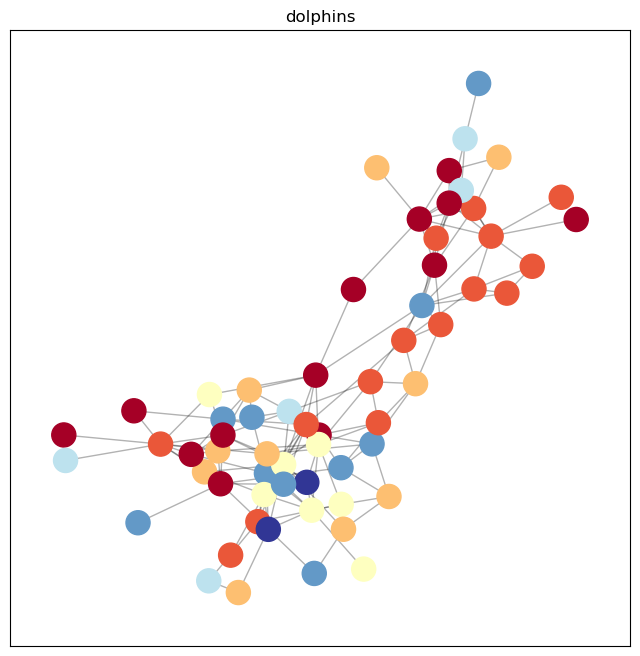

Best solution in generation is: x = [1, 6, 3, 6, 1, 1, 2, 2, 5, 5, 6, 5, 2, 1, 6, 6, 7, 2, 3, 2, 4, 3, 1, 4, 1, 2, 2, 2, 2, 1, 3, 2, 5, 4, 2, 6, 1, 4, 4, 1, 2, 2, 6, 7, 4, 1, 3, 2, 3, 5, 3, 2, 6, 6, 1, 1, 3, 1, 4, 3, 6, 3]


[1,
 6,
 3,
 6,
 1,
 1,
 2,
 2,
 5,
 5,
 6,
 5,
 2,
 1,
 6,
 6,
 7,
 2,
 3,
 2,
 4,
 3,
 1,
 4,
 1,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 5,
 4,
 2,
 6,
 1,
 4,
 4,
 1,
 2,
 2,
 6,
 7,
 4,
 1,
 3,
 2,
 3,
 5,
 3,
 2,
 6,
 6,
 1,
 1,
 3,
 1,
 4,
 3,
 6,
 3]

In [29]:
community_name = "dolphins"
network = readDatas(f"data/{community_name}.gml")
drawCommunities(f"{community_name}", network)